
### AllLife Credit Card Customer Segmentation

<img src="https://miro.medium.com/max/681/1*iejTpHhx-u_R73XQD0GFkg.jpeg">

### General Informations

AllLife Bank wants to focus and reconsider its strategy on its credit card customers the next
financial year. They have been advised by their marketing research team, that the
penetration in the market can be improved. Based on this input, the Marketing team
proposes to run personalised campaigns to target new customers as well as upsell to
existing customers. Another insight from the market research was that the customers
perceive the support services of the back poorly. Based on this, the Operations team
wants to upgrade the service delivery model, to ensure that customers queries are
resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the
df Science team for help.

<b>Objectives </b><br>
This case main aim is to identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank in order to define marketing strategy and better customer care.<br>
This study also aims to built and present different Unsupervised Machine Learning Techniques and more specifically Clustering Methods in order to suceed the optimum segmetation and exploitation of the data set.<br> 


<b>Questions that will be answered:</b> <br>  
1. How many different segments of customers are there?<br>
2. How are these segments different from each other?<br>
3. What are your recommendations to the bank on how to better market to and
service these customers?

<B> Description of the Data set<BR>

The small sample dataset summarizes information and behavior of 660 active credit card holders by presenting figures of their card usage and communication ways with the Bank. The customer level file contains two (2) identification attributes, two (2)qualitative variables and three (3) behavioral variables.
One significant feature of the dataset is the Average Credit Limit every Customer combined with the total number of credit cards owned by each.
Additinally it includes significant information about the different channels through which customer has
contacted the bank for any queries and service.<br>


**Sl_No :** It is the sequencial Number of customers 

**Customer Key :** Bank Customer Identification Number 

**Avg_Credit_Limit :** The Average Credit Limit of the Customer holding one or more credit cards 

**Total_Credit_Cards:** The Number of credits cards a customer holds

**Total_visits_bank :** The number of visits of the Customer to the Bank premices 

**Total_visits_online :** The number of online visits of the Customer to the Bank web site

**Total_calls_made :** The number of phone call the Customer made to the Bank for any queries



### Necessary Packages Installations

In [1]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import seaborn
import seaborn as sns
import itertools
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
import umap
from scipy.stats import norm 
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn import cluster 
from sklearn.cluster import SpectralClustering

import warnings
warnings.filterwarnings("ignore")

#### Exploratory Data Analysis<br>
Main Tasks are to perform <b>Univariate Analysis</b> on the data to better understand the variables and to get an idea about the no of clusters.<br>
For this purpose we perform EDA and create visualizations to explore data.<br>
Also we comment on the codes, providing explanations of the steps taken in the notebook and conclude the <b>insights from the graphs</b>. 

In [3]:
df = pd.read_excel("Credit Card Customer data.xlsx")

In [4]:
df.head()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3

In [5]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [6]:
df.shape

(660, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [8]:
df[['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']].nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [9]:
df['Customer Key'].duplicated().sum()

5

In [10]:
duplicateRowsDF = df[df['Customer Key'].duplicated(keep=False)]
#print(duplicateRowsDF)
duplicateRowsDF

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
4        5         47437            100000                   6   
48      49         37252              6000                   4   
104    105         97935             17000                   2   
332    333         47437             17000                   7   
391    392         96929             13000                   4   
398    399         96929             67000                   6   
411    412         50706             44000                   4   
432    433         37252             59000                   6   
541    542         50706             60000                   7   
632    633         97935            187000                   7   

     Total_visits_bank  Total_visits_online  Total_calls_made  
4                    0                   12                 3  
48                   0                    2                 8  
104                  1                    2                10  
332                  3                    1                 0  
391                  5                    0                 0  
398                  2                    2                 2  
411                  5                    0                 2  
432                  2                    1                 2  
541                  5                    2                 2  
632                  1                    7                 0

In [11]:
df.describe().round()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
count  660.0         660.0             660.0               660.0   
mean   330.0       55141.0           34574.0                 5.0   
std    191.0       25628.0           37625.0                 2.0   
min      1.0       11265.0            3000.0                 1.0   
25%    166.0       33825.0           10000.0                 3.0   
50%    330.0       53874.0           18000.0                 5.0   
75%    495.0       77202.0           48000.0                 6.0   
max    660.0       99843.0          200000.0                10.0   

       Total_visits_bank  Total_visits_online  Total_calls_made  
count              660.0                660.0             660.0  
mean                 2.0                  3.0               4.0  
std                  2.0                  3.0               3.0  
min                  0.0                  0.0               0.0  
25%                  1.0                  1.0               1.0  
50%                  2.0                  2.0               3.0  
75%                  4.0                  4.0               5.0  
max                  5.0                 15.0              10.0

### insights A
The Dataset has 660 Rows and 7 Columns/attributes which are all integers
There are non null values in any of the attributes/variables<br>
From our search we found that there are 5 duplicate values in the "Customer Key" feature however from further investigation of the relative Rows, we found that there is no need to drop duplicates as all the other features of the respective rows are different.

### Distribution of independent variables

<module 'matplotlib.pyplot' from 'C:\\Users\\d.zografos\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

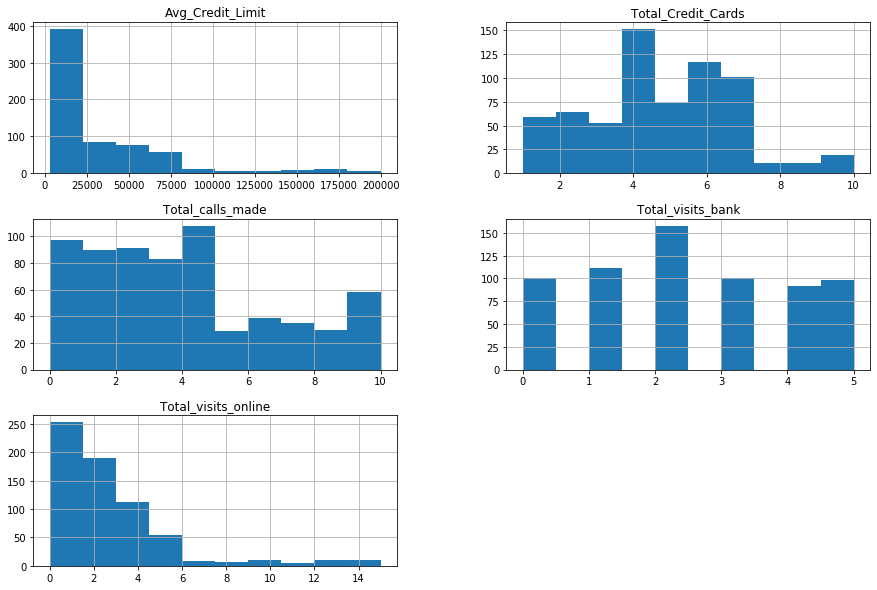

In [12]:
#variables in charts

df[['Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']].hist(figsize=(15,10))
plt
#.tight_layout

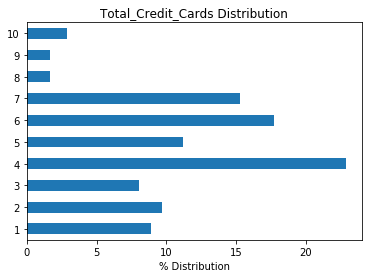

In [13]:
(1e2*df['Total_Credit_Cards'].value_counts().sort_index()/len(df)).plot(kind='barh')
plt.title('Total_Credit_Cards Distribution')
plt.xlabel('% Distribution');

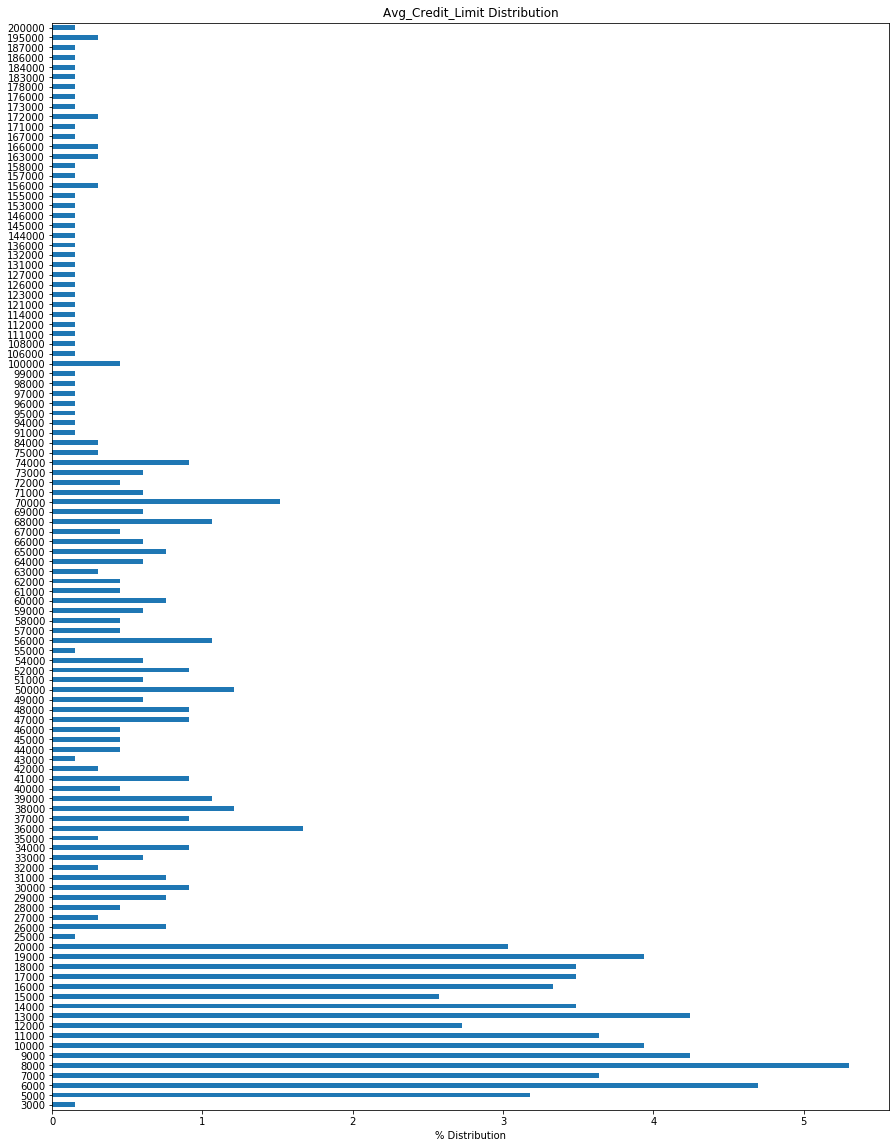

In [14]:
plt.figure(figsize=(15, 20))
(1e2*df['Avg_Credit_Limit'].value_counts().sort_index()/len(df)).plot(kind='barh')
plt.title('Avg_Credit_Limit Distribution')
plt.xlabel('% Distribution');

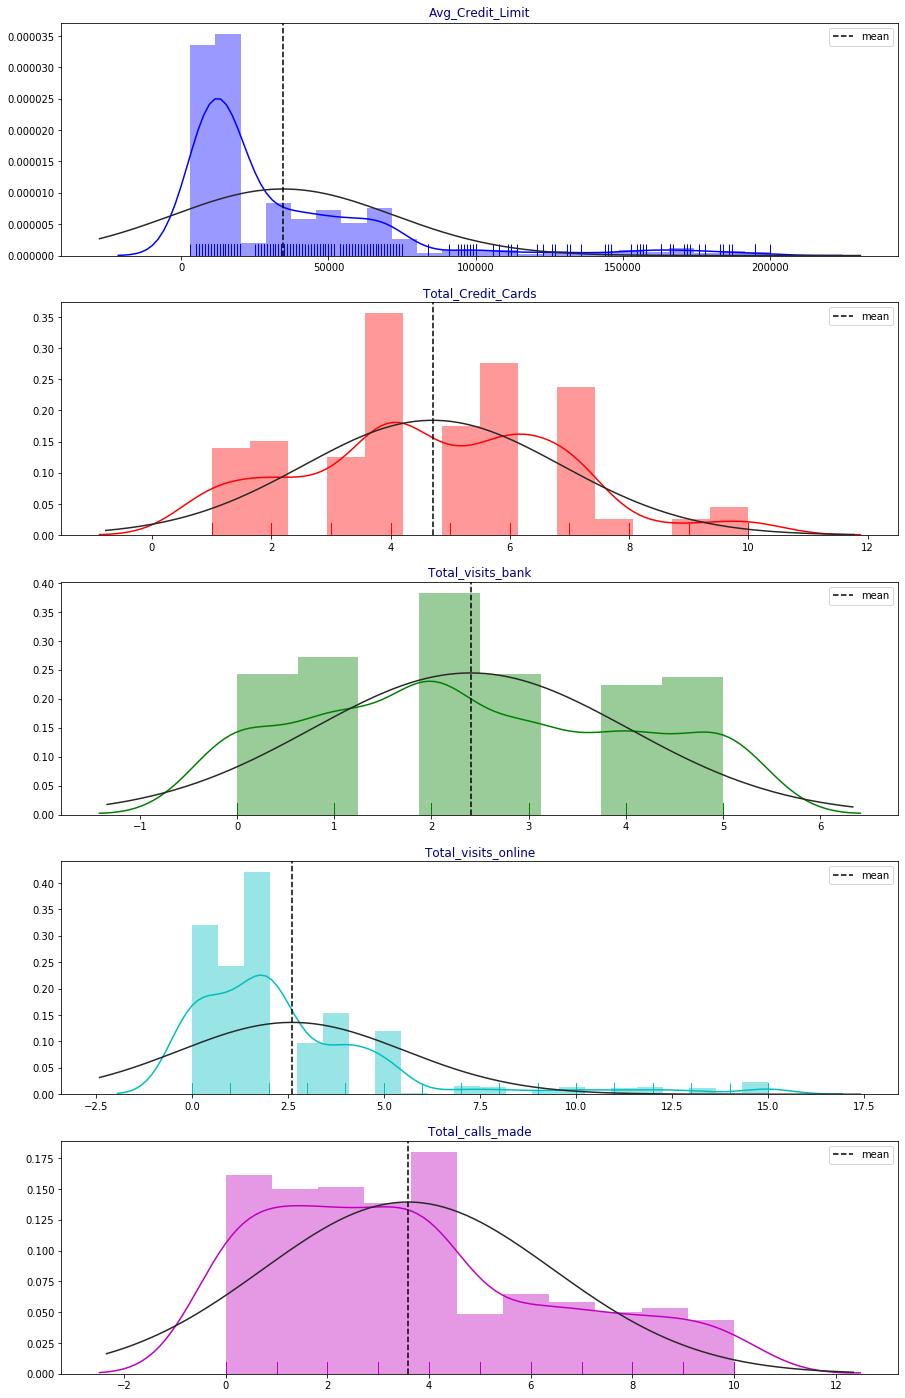

In [15]:
cols=['Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
#cols = [i for i in df.columns if i not in 'Customer Key'or 'SI_No']
length = len(cols)
cs = ["b","r","g","c","m"]
fig = plt.figure(figsize=(15,30))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(6,1,j+1)
    ax = sns.distplot(df[i],color=k,rug=True, fit=norm)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

Text(0, 0.5, 'Avg_Credit_Limit')

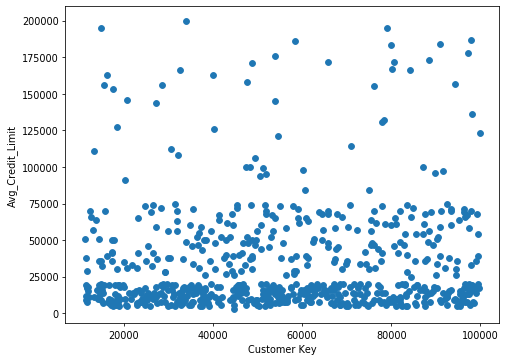

In [16]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=70, facecolor='w', edgecolor='k')
plt.scatter(df['Customer Key'], df['Avg_Credit_Limit'])
plt.xlabel('Customer Key')
plt.ylabel('Avg_Credit_Limit')

Text(0, 0.5, 'Avg_Credit_Limit')

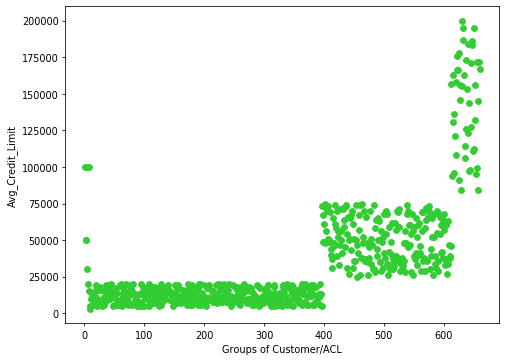

In [17]:
figure(num=None, figsize=(8, 6), dpi=70, facecolor='w', edgecolor='k')
plt.scatter(df['Sl_No'], df['Avg_Credit_Limit'], color='limegreen')
plt.xlabel('Groups of Customer/ACL')    
plt.ylabel('Avg_Credit_Limit')


Total_visits_bank      1586
Total_visits_online    1720
Total_calls_made       2365
dtype: int64

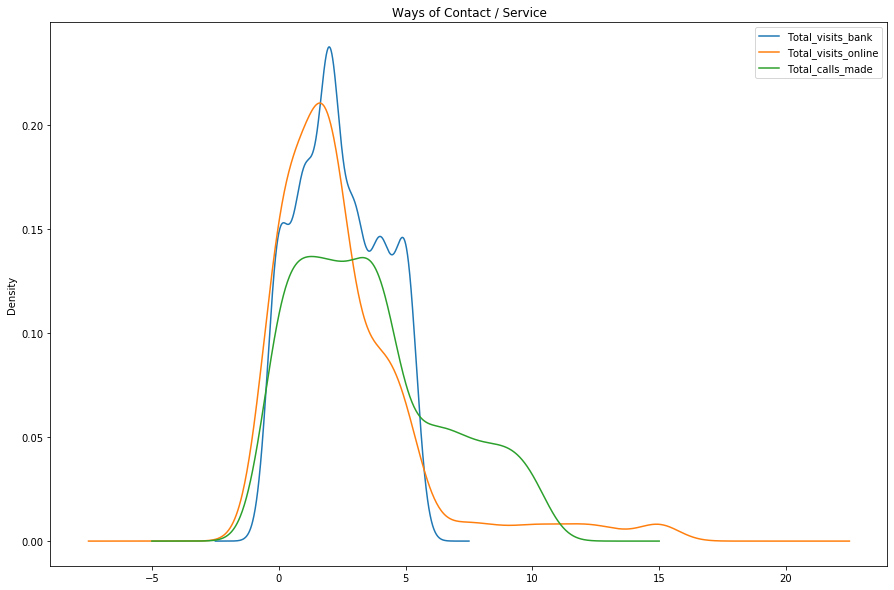

In [18]:
df[['Total_visits_bank', 'Total_visits_online', 'Total_calls_made']].plot.kde(figsize=(15, 10),title='Ways of Contact / Service')
df[['Total_visits_bank', 'Total_visits_online', 'Total_calls_made']].sum()

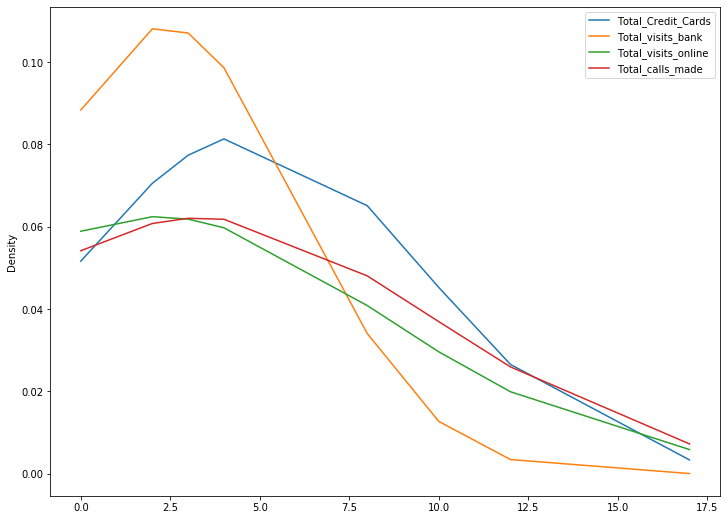

In [19]:
ax = df[['Total_Credit_Cards','Total_visits_bank', 'Total_visits_online', 'Total_calls_made']].plot.kde(figsize=(12,9), bw_method=2,ind=[0,2,3,4,8,10,12,17]) #,ind=[0, 2, 3,4]

Text(0.5, 1, 'Correlation Matrix')

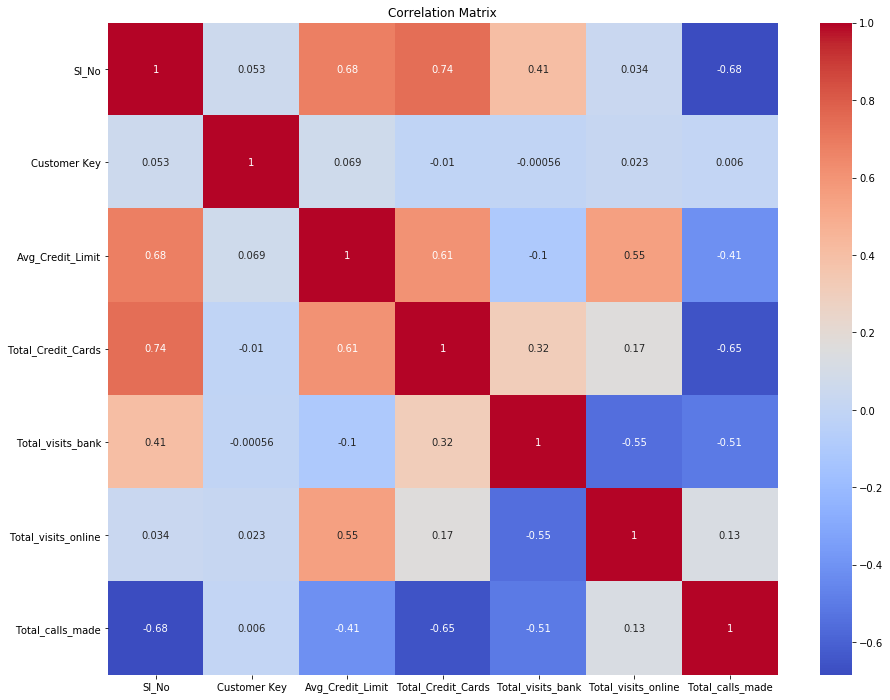

In [20]:
# Validation of the pair-plot and scatter plot views via Pair-wise Pearson Correlations
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),cmap='coolwarm', annot=True)

plt.title('Correlation Matrix')

### insights b.
From the Correlation Matrix we can see that there are high correlations between:<br>
Average Credit Limit with the Number of Credit cards owned by each customer (positive)<br>
Average Credit Limit with the Number of Visits online (positive)<br>
Average Credit Limit with the Number of Calls made (negative)and<br>
Total Credit Cards with the Number of Calls made (negative).

### 4. Overview about Outliers

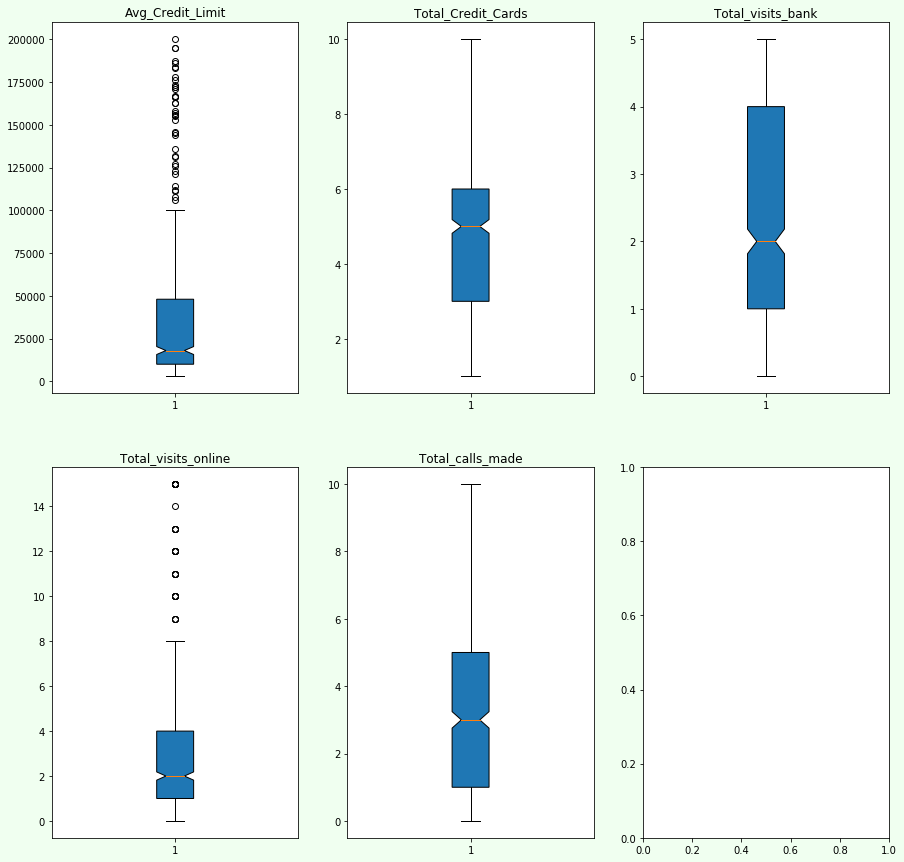

In [21]:
fig, axs = plt.subplots(2, 3, figsize = (15,15))
fig.set_facecolor("honeydew")

axs[0, 0].boxplot(df.Avg_Credit_Limit,notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True) # fill with color 
axs[0, 0].set_title('Avg_Credit_Limit')

axs[0, 1].boxplot(df.Total_Credit_Cards,notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                        patch_artist=True) # fill with color
axs[0, 1].set_title('Total_Credit_Cards')

axs[0, 2].boxplot(df.Total_visits_bank,notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True) # fill with color)
axs[0, 2].set_title('Total_visits_bank')

axs[1, 0].boxplot(df.Total_visits_online,notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True) # fill with color)
axs[1, 0].set_title('Total_visits_online')

axs[1, 1].boxplot(df['Total_calls_made'],notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True) # fill with color)
axs[1, 1].set_title('Total_calls_made')


plt.show()


### Insights C.:
There is no need for treatment for the outliers. Our aim is to define clusters within dataset.
Conclusions from the Graphs<br>
a. Customers of the Bank use to hold more than one credit card each. Also we can see some grouping posibilities to 1-3 cards, 4-7 cards and 7-10 cards.<br>
b. we can observe 3 Groups of Customers according to Average Credit Limit. One Group of about 400 customers with Avg Credit Limit up to 25000. One group of about 200 customers with ACL form 25000-80000 and the third one with 50-60 customers with ACL between 80000-200000.<br>
c. It was also extracted from the analysis that most of the customers prefer to be servised without visiting the Bank.<br>
Customers prefer the remote access and communication with the bank, that is they use these methods (web and phone) many times (up to 15) while they visit the Bank Premices very few times. More specifically from the statistical analysis we saw that the maximum visits were 5 while online and phone use max values was 15 and 10 times respectively.
Further analysis we have an additional view of the three (3) ways of customer service and support. Telephone use was the champion (2365 times) followed by the Online Visits (1720) and least prefered is the visit to the Bank (1586 times).
Of course it can also can be suggested that the visits to the Bank are more efficient for the customer queries.
Finally also Communication methods can also be grouped in 3 clusters as most of the customers communicate online and telephone or visit the Bank up to two (2) times and the rest more times 3-7 and 8-15.


##### Clustering Methods

In [22]:
df = pd.read_excel("Credit Card Customer data.xlsx")
df.head()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3

##### Kmeans 
We will determine the Number of Clusters with Elbow Method and analyse clusters using Boxplots.<br>
We will also normalize our data applying the "zscore" scaler.

In [23]:
dfAttr=df.iloc[:,2:]
dfzscore=dfAttr.apply(zscore)
dfzscore.head()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0          1.740187           -1.249225          -0.860451   
1          0.410293           -0.787585          -1.473731   
2          0.410293            1.058973          -0.860451   
3         -0.121665            0.135694          -0.860451   
4          1.740187            0.597334          -1.473731   

   Total_visits_online  Total_calls_made  
0            -0.547490         -1.251537  
1             2.520519          1.891859  
2             0.134290          0.145528  
3            -0.547490          0.145528  
4             3.202298         -0.203739

<function matplotlib.pyplot.show(*args, **kw)>

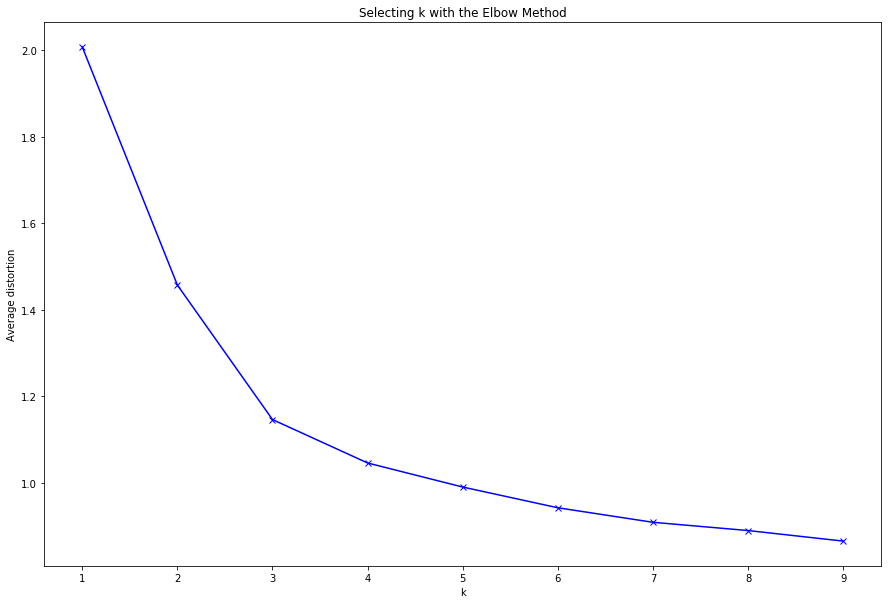

In [24]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dfzscore)
    prediction=model.predict(dfzscore)
    meanDistortions.append(sum(np.min(cdist(dfzscore, model.cluster_centers_, 
                                            'euclidean'), axis=1)) / dfzscore.shape[0])

plt.figure(figsize=(15,10))
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show

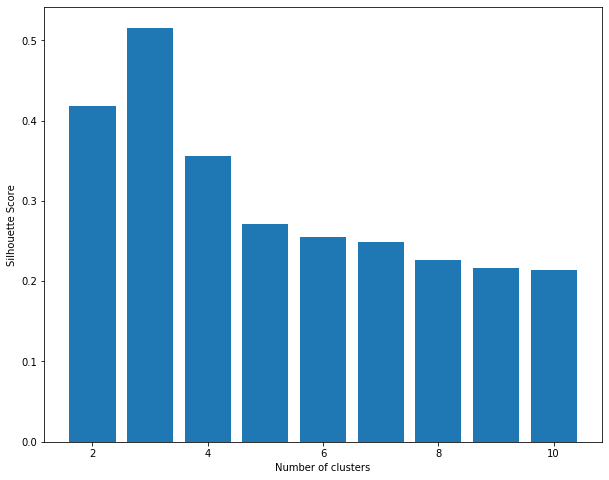

In [25]:
plt.figure(figsize=(10,8))
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(dfzscore, KMeans(n_clusters = n_cluster).fit_predict(dfzscore))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [26]:
kmeans_values=[]

for cluster in range(2,11):
    kmeans = KMeans(n_clusters=cluster, random_state=40).fit_predict(dfzscore)
    sil_score = metrics.silhouette_score(dfzscore,kmeans, metric='euclidean')
    print("Silhouette score for {} cluster k-means: {:.3f}".format(cluster,
                                                               metrics.silhouette_score(dfzscore, kmeans, metric='euclidean')))
    kmeans_values.append((cluster,sil_score))

Silhouette score for 2 cluster k-means: 0.418
Silhouette score for 3 cluster k-means: 0.516
Silhouette score for 4 cluster k-means: 0.356
Silhouette score for 5 cluster k-means: 0.272
Silhouette score for 6 cluster k-means: 0.248
Silhouette score for 7 cluster k-means: 0.248
Silhouette score for 8 cluster k-means: 0.227
Silhouette score for 9 cluster k-means: 0.214
Silhouette score for 10 cluster k-means: 0.211


In [27]:
df = pd.read_excel("Credit Card Customer data.xlsx")
df.head()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3

In [28]:
dfAttr=df.iloc[:,:]
#dfzscore=dfAttr.apply(zscore)
#dfzscore.head()
scaler = StandardScaler()
df_std = scaler.fit_transform(dfAttr)

In [29]:
wcss = []
cluster_list = range(1, 11)
for i in cluster_list :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 40)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

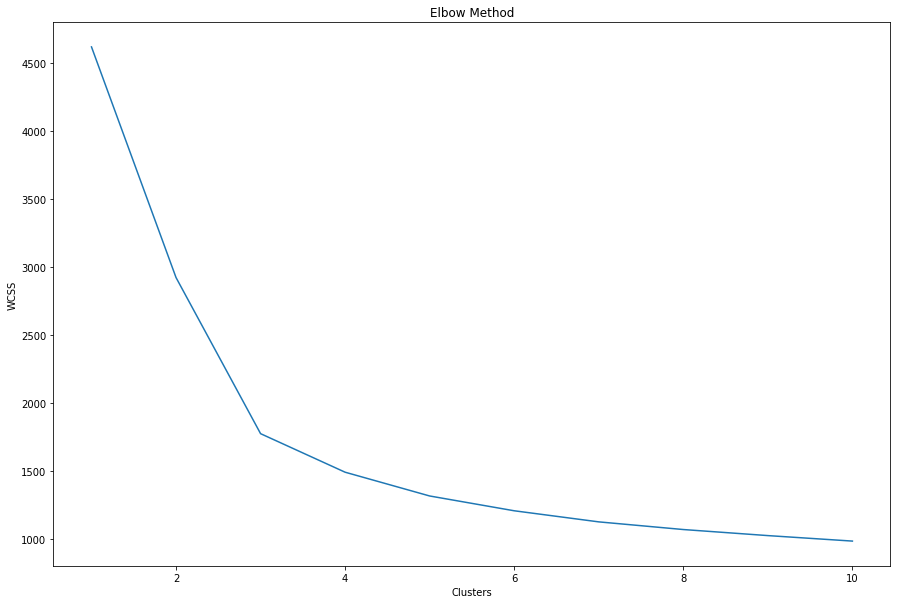

In [30]:
plt.figure(figsize=(15,10))
plt.plot(cluster_list, wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

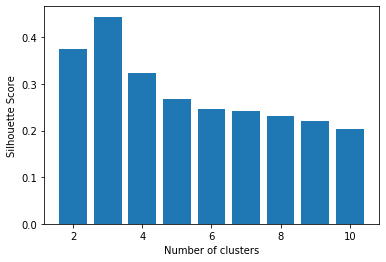

In [31]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append(silhouette_score(df_std, KMeans(n_clusters = n_cluster).fit_predict(df_std))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [32]:
kmeans_values=[]

for cluster in range(2,11):
    kmeans = KMeans(n_clusters=cluster, random_state=40).fit_predict(df_std)
    sil_score = metrics.silhouette_score(df_std,kmeans, metric='euclidean')
    print("Silhouette score for {} cluster k-means: {:.3f}".format(cluster,
                                                               metrics.silhouette_score(df_std, kmeans, metric='euclidean')))
    kmeans_values.append((cluster,sil_score))

Silhouette score for 2 cluster k-means: 0.375
Silhouette score for 3 cluster k-means: 0.444
Silhouette score for 4 cluster k-means: 0.324
Silhouette score for 5 cluster k-means: 0.267
Silhouette score for 6 cluster k-means: 0.245
Silhouette score for 7 cluster k-means: 0.241
Silhouette score for 8 cluster k-means: 0.230
Silhouette score for 9 cluster k-means: 0.211
Silhouette score for 10 cluster k-means: 0.207


#####  distribution of the data (K = 3). One of the most informative visual tool is boxplot.

In [33]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(dfzscore)
prediction=final_model.predict(dfzscore)

#Append the prediction 
df["GROUP"] = prediction
dfzscore["GROUP"] = prediction
print("Groups Assigned : \n")
dfzscore.head(10).round(2)

Groups Assigned : 



Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0              1.74               -1.25              -0.86   
1              0.41               -0.79              -1.47   
2              0.41                1.06              -0.86   
3             -0.12                0.14              -0.86   
4              1.74                0.60              -1.47   
5             -0.39               -0.79              -1.47   
6              1.74                0.14              -1.47   
7             -0.52               -0.79              -1.47   
8             -0.79               -1.25              -1.47   
9             -0.84               -0.33              -1.47   

   Total_visits_online  Total_calls_made  GROUP  
0                -0.55             -1.25      0  
1                 2.52              1.89      1  
2                 0.13              0.15      0  
3                -0.55              0.15      0  
4                 3.20             -0.20      2  
5                -0.55              1.54      1  
6                 2.86             -0.55      2  
7                -0.55             -0.90      1  
8                -0.21             -0.55      1  
9                -0.55              1.19      1

In [34]:
creditClust = dfzscore.groupby(['GROUP'])
creditClust.mean()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
GROUP                                                            
0             -0.021062            0.373690           0.666395   
1             -0.595796           -1.059623          -0.901518   
2              2.831764            1.862226          -1.105763   

       Total_visits_online  Total_calls_made  
GROUP                                         
0                -0.553672         -0.553005  
1                 0.322997          1.148109  
2                 2.827319         -0.874330

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002272609A708>,
      dtype=object)

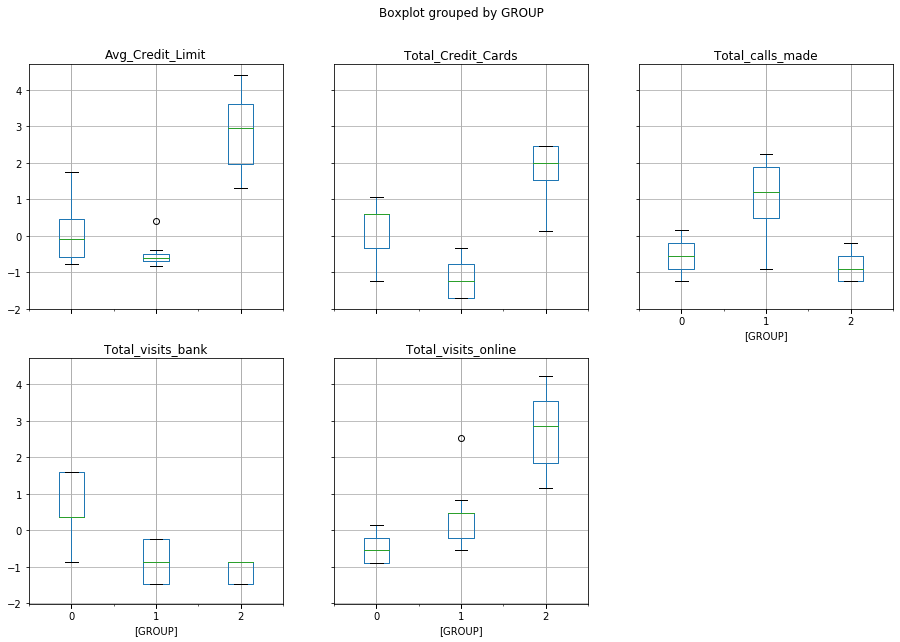

In [35]:
dfzscore.boxplot(by='GROUP', layout = (2,3),figsize=(15,10))

#### From the Boxplots we observe that each group (the observations that contains) is different from the other so we can say that it is a succefull clustering/segmetation.

### Let us next try with K = 4, the next elbow point

In [36]:
# Let us first start with K = 4
final_model=KMeans(4)
final_model.fit(dfzscore)
prediction=final_model.predict(dfzscore)

#Append the prediction 
df["GROUP"] = prediction
dfzscore["GROUP"] = prediction
print("Groups Assigned : \n")
df.head()

Groups Assigned : 



Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  GROUP  
0                  1                    1                 0      1  
1                  0                   10                 9      0  
2                  1                    3                 4      1  
3                  1                    1                 4      1  
4                  0                   12                 3      2

In [37]:
creditClust = dfzscore.groupby(['GROUP'])
creditClust.mean()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
GROUP                                                            
0             -0.596133           -1.060843          -0.898953   
1              0.041973            0.384089           0.048574   
2              2.831764            1.862226          -1.105763   
3             -0.089048            0.356795           1.295713   

       Total_visits_online  Total_calls_made  
GROUP                                         
0                 0.326900          1.157303  
1                -0.563063         -0.533503  
2                 2.827319         -0.874330  
3                -0.543901         -0.575064

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022725E1BDC8>,
      dtype=object)

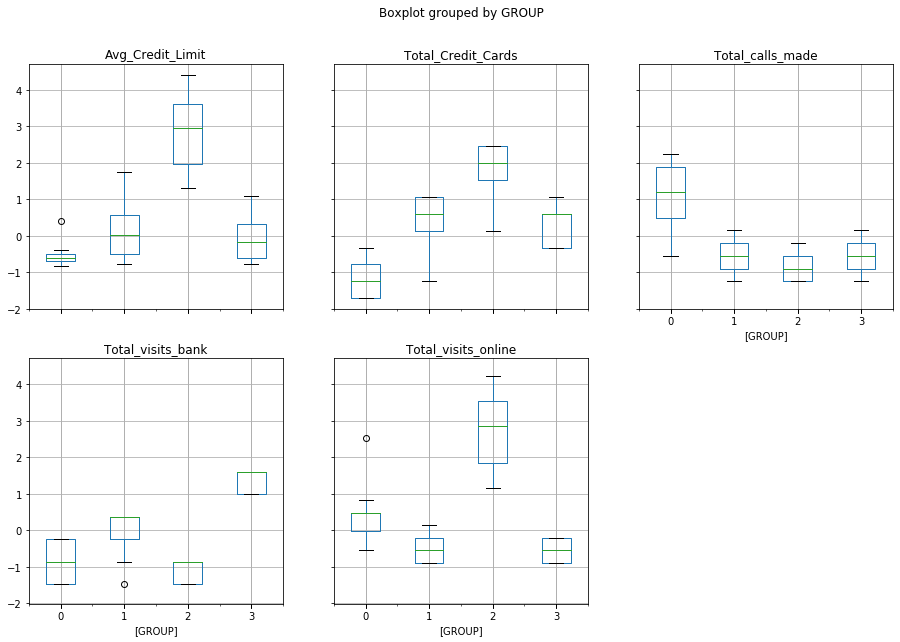

In [38]:
dfzscore.boxplot(by='GROUP', layout = (2,3),figsize=(15,10))

In [39]:
df.head()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  GROUP  
0                  1                    1                 0      1  
1                  0                   10                 9      0  
2                  1                    3                 4      1  
3                  1                    1                 4      1  
4                  0                   12                 3      2

In [40]:
dfzscore.head().round(2)

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0              1.74               -1.25              -0.86   
1              0.41               -0.79              -1.47   
2              0.41                1.06              -0.86   
3             -0.12                0.14              -0.86   
4              1.74                0.60              -1.47   

   Total_visits_online  Total_calls_made  GROUP  
0                -0.55             -1.25      1  
1                 2.52              1.89      0  
2                 0.13              0.15      1  
3                -0.55              0.15      1  
4                 3.20             -0.20      2

Text(0.5, 1, 'Correlation Matrix')

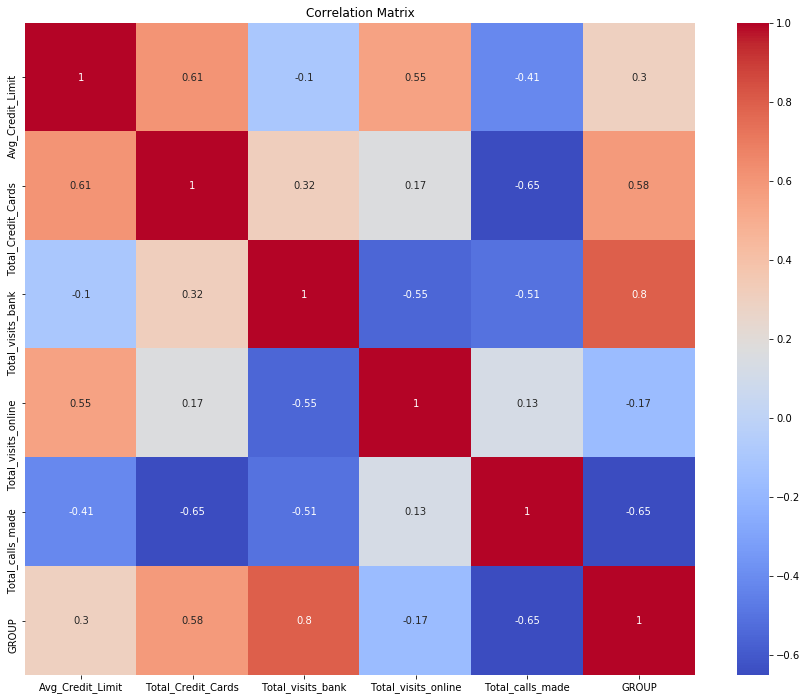

In [41]:
# Validation of the pair-plot via Pair-wise Pearson Correlations
plt.figure(figsize=(15,12))
sns.heatmap(dfzscore.corr(),cmap='coolwarm', annot=True)

plt.title('Correlation Matrix')

###  5.2 Hierarchical Clustering

In [42]:
Silhouette_list_hierarchical = []

for cluster in range(2,10,1):
    for linkage_method in ['ward', 'average', 'complete', 'single']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',n_clusters=cluster).fit_predict(dfzscore)
        sil_score = metrics.silhouette_score(dfzscore, agglomerative, metric='euclidean')
        Silhouette_list_hierarchical.append((cluster, sil_score, linkage_method, len(set(agglomerative)) ) )
        
df_hierarchical = pd.DataFrame(Silhouette_list_hierarchical, columns=['cluster', 'sil_score','linkage_method', 'number_of_clusters'])

In [43]:
df_hierarchical.sort_values('sil_score', ascending=False)

cluster  sil_score linkage_method  number_of_clusters
4         3   0.515121           ward                   3
5         3   0.515121        average                   3
6         3   0.514303       complete                   3
8         4   0.510306           ward                   4
1         2   0.506082        average                   2
2         2   0.506082       complete                   2
17        6   0.463515        average                   6
7         3   0.451197         single                   3
9         4   0.445184        average                   4
21        7   0.436798        average                   7
0         2   0.432284           ward                   2
12        5   0.406131           ward                   5
13        5   0.399045        average                   5
29        9   0.389766        average                   9
27        8   0.387264         single                   8
25        8   0.386743        average                   8
31        9   0.383409         single                   9
18        6   0.380788       complete                   6
26        8   0.368717       complete                   8
22        7   0.368451       complete                   7
30        9   0.367160       complete                   9
3         2   0.351109         single                   2
10        4   0.349541       complete                   4
11        4   0.334263         single                   4
14        5   0.322055       complete                   5
16        6   0.319690           ward                   6
15        5   0.304570         single                   5
24        8   0.234867           ward                   8
20        7   0.229579           ward                   7
19        6   0.224098         single                   6
28        9   0.210199           ward                   9
23        7   0.193632         single                   7

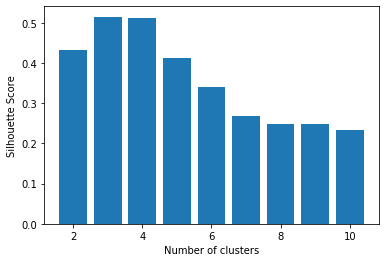

In [44]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(dfzscore, KMeans(n_clusters = n_cluster).fit_predict(dfzscore))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [45]:
#### generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(dfzscore, 'ward', metric='euclidean')
Z.shape

(659, 4)

In [46]:
Z[:]

array([[ 464.        ,  497.        ,    0.        ,    2.        ],
       [ 425.        ,  455.        ,    0.        ,    2.        ],
       [ 250.        ,  361.        ,    0.        ,    2.        ],
       ...,
       [1313.        , 1314.        ,   32.74609376,  386.        ],
       [1311.        , 1316.        ,   47.07349069,  436.        ],
       [1315.        , 1317.        ,   60.66587986,  660.        ]])

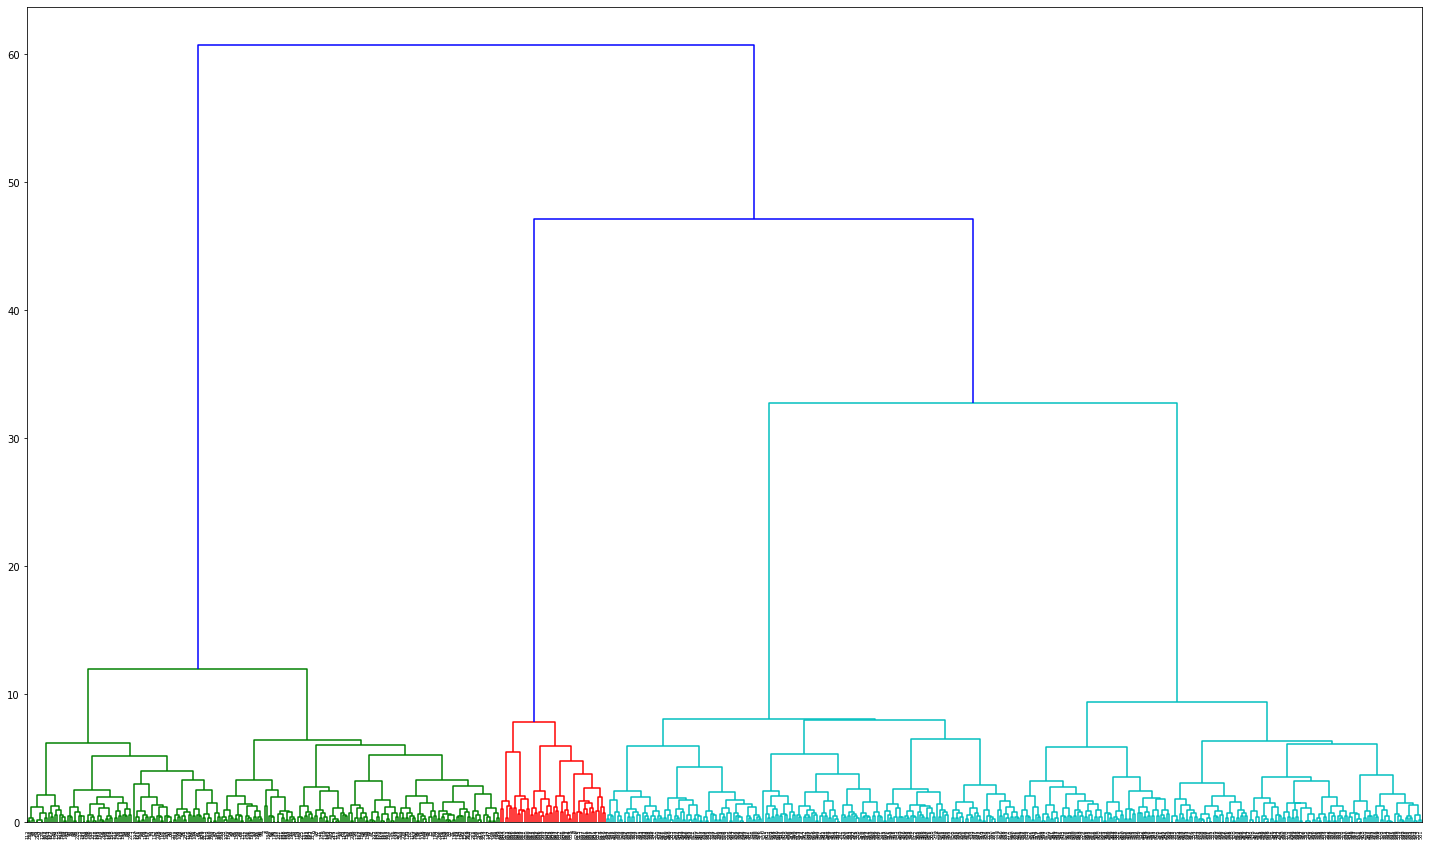

In [47]:
plt.figure(figsize=(25, 15))
dendrogram(Z)
plt.show()

### From the truncated dendrogram we find out the optimal distance between clusters which used as an input for clustering data

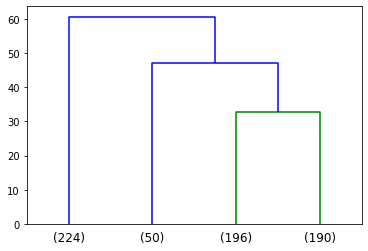

In [48]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
)
plt.show()

In [49]:
max_d = 30

### We Use the distance measure (max_d) and fcluster function to cluster the data into 4 different groups

In [50]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 1, 3, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 4, 3, 4, 3, 4, 4, 4, 4, 3, 3, 3, 4,
       3, 4, 3, 3, 4, 3, 4, 4, 3, 3, 4, 3, 3, 4, 3, 4, 3, 4, 4, 3, 4, 3,
       4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 3, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4,
       4, 3, 3, 4, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,

In [51]:
# Calculate Avg Silhoutte Score

from sklearn.metrics import silhouette_score
silhouette_score(dfzscore,clusters)

0.5103057384126307

In [52]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(dfzscore, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(dfzscore))

c

0.8834326658927445

##### Silhouette Score and Cophenet index is better when closer 1 and worse when closer to -1. <br>In our case the Silhoutte score is fairly good (0.51) and Cophenet index is excellent (0.88) so we can built the final dendogram. 

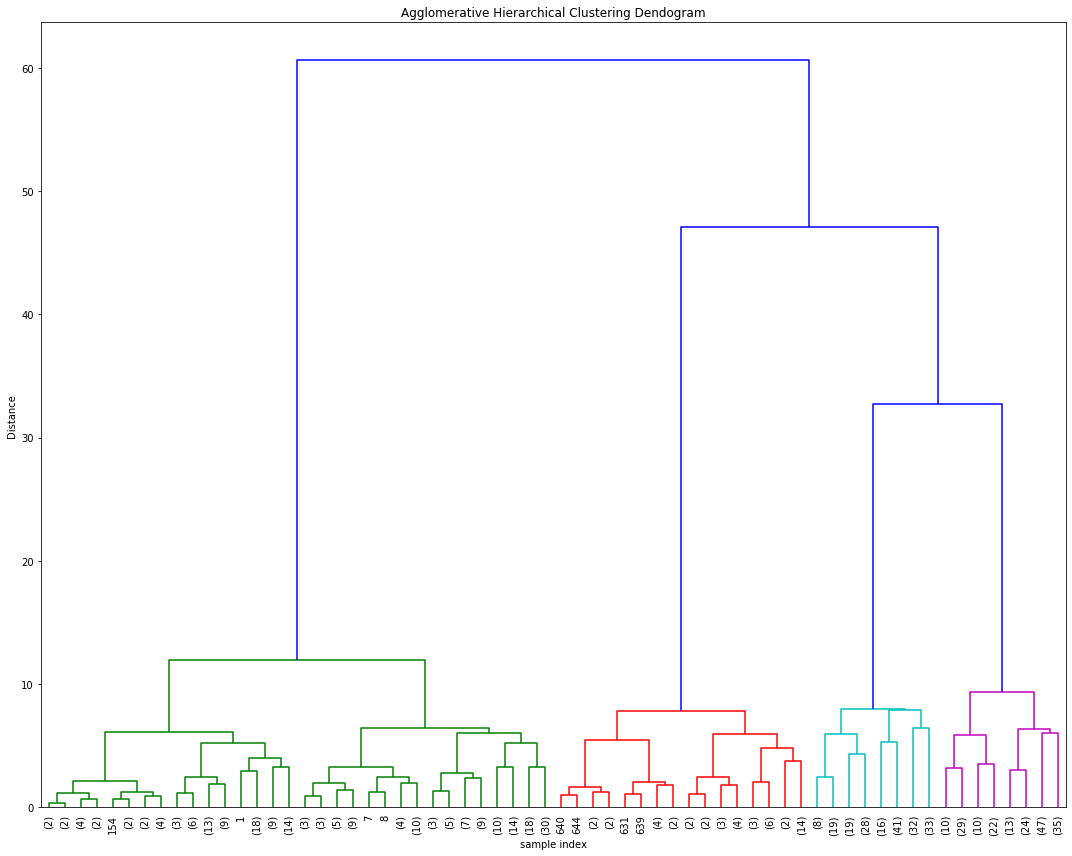

In [53]:

plt.figure(figsize=(15, 12))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(dfzscore, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=30,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [54]:
dfzscore['GROUP'].value_counts()

0    223
1    197
3    190
2     50
Name: GROUP, dtype: int64

##### Compering Results for the Optimal Number of Cluster Model

In [55]:
kmeans_      = KMeans(n_clusters=3, random_state=40).fit_predict(dfzscore)

In [56]:
hierarchical_= AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=4).fit_predict(dfzscore)

In [57]:
kmeansSilhouette_Score        = metrics.silhouette_score(dfzscore, kmeans_, metric='euclidean')

Hierarchical_Silhouette_Score = metrics.silhouette_score(dfzscore, hierarchical_, metric='euclidean')


In [58]:
Clustering_Silhouette_Scores  = [ ['KMeans',kmeansSilhouette_Score ],['Hierarchical',Hierarchical_Silhouette_Score ]]

Clustering_Silhouette_Scores  = pd.DataFrame(Clustering_Silhouette_Scores, columns=['Clustering Method', 'Silhouette Score']) 
Clustering_Silhouette_Scores.sort_values(by='Silhouette Score', ascending= False)

Clustering Method  Silhouette Score
0            KMeans          0.515121
1      Hierarchical          0.510306

<b>Hierarchical method with 4 clusters seems more suitable with higher silhouette score (0.515) comparing to Kmeans with 3 clusters and silhouette score (0.510). However they are close.  

###### Dimensions Reduction using PCA<br>
    
**In the following section we will examine how the results are affected by dimension reduction methods.**

**PCA method will be used to reduce the dimensions of the dataset from 6 to 3** 

In [59]:
# Normalizing the df 
df_nor = normalize(dfzscore) 


# View the new feature df's shape 
df_nor.shape 

(660, 6)

In [60]:
dfzscore.head()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0          1.740187           -1.249225          -0.860451   
1          0.410293           -0.787585          -1.473731   
2          0.410293            1.058973          -0.860451   
3         -0.121665            0.135694          -0.860451   
4          1.740187            0.597334          -1.473731   

   Total_visits_online  Total_calls_made  GROUP  
0            -0.547490         -1.251537      1  
1             2.520519          1.891859      0  
2             0.134290          0.145528      1  
3            -0.547490          0.145528      1  
4             3.202298         -0.203739      2

In [61]:
# PCA 3 dimension

pca = PCA(n_components=3).fit(df_nor)

df_pca3 = pca.fit_transform(df_nor)
print("original shape:   ", df_nor.shape)
print("transformed shape:", df_pca3.shape)

original shape:    (660, 6)
transformed shape: (660, 3)


In [62]:
df_pca3 = pd.DataFrame(df_pca3) 
df_pca3.columns = ['A1', 'A2', 'A3']
df_pca3.head()

A1        A2        A3
0 -0.084091  0.369326  0.559893
1  0.858932  0.603395 -0.262860
2 -0.174419  0.649877 -0.073816
3  0.018254  0.034577  0.221734
4  0.090928  0.859242 -0.086799

In [63]:
df_pca3.columns = ['A1', 'A2','A3'] 

In [64]:
fig = px.scatter_3d(df_pca3, x=df_pca3['A1'], y= df_pca3['A2'], z=df_pca3['A3'], color=df['GROUP']) 

fig.show()

In [65]:
print(pca.explained_variance_)

[0.47916086 0.11621436 0.06689977]


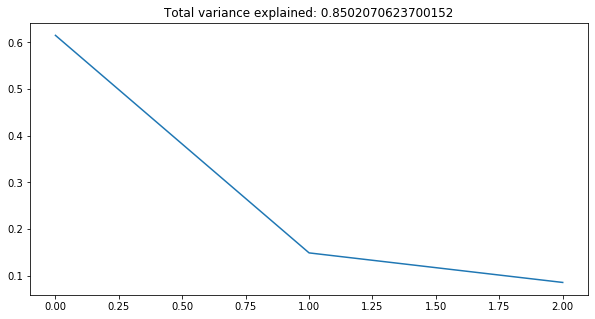

In [66]:
plt.figure(figsize = (10,5))
plt.plot(pca.explained_variance_ratio_)
plt.title('Total variance explained: {}'.format(pca.explained_variance_ratio_.sum()))
plt.show()

##### If we would like to use PCA dimension reduction, PCA in 3 dimensions gives a good score of explained variance.

##### Understanding Clusters by Customer Segmentation

In [67]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made',
       'GROUP'],
      dtype='object')

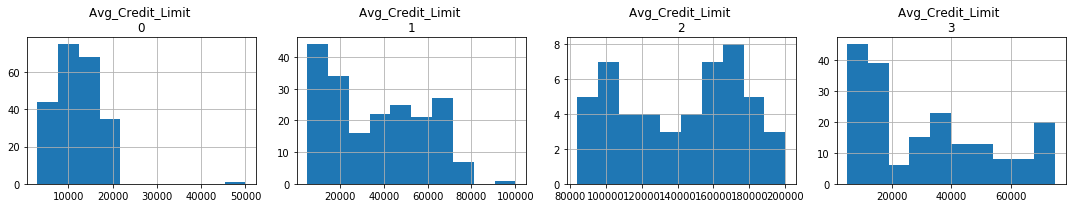

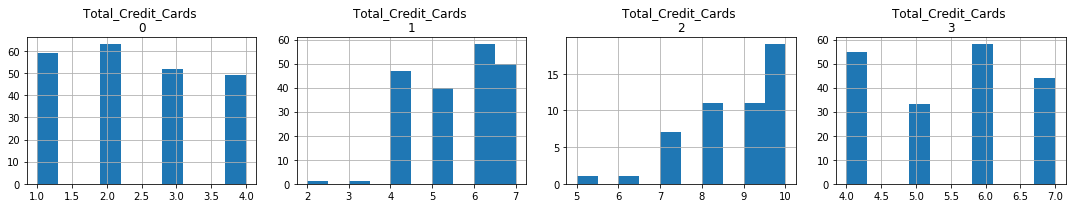

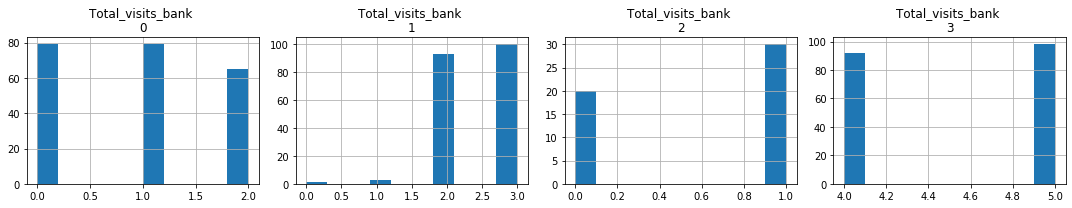

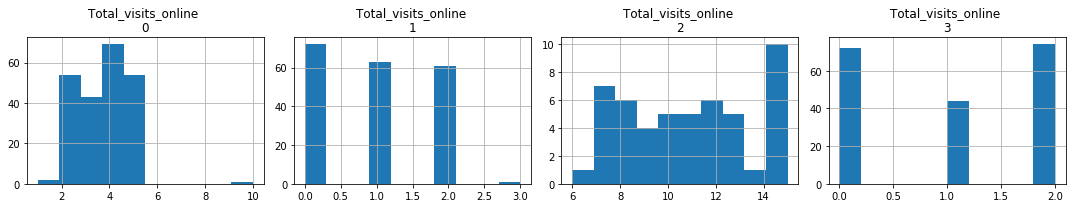

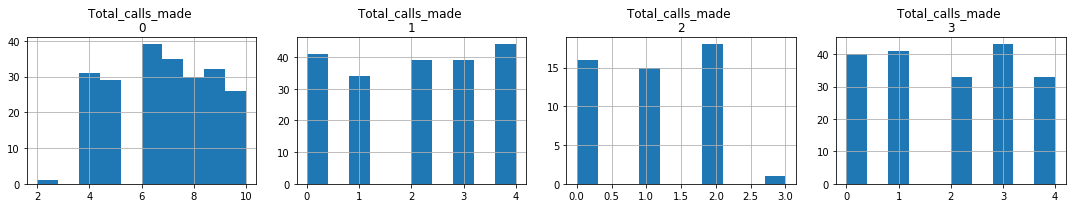

In [68]:
col_list= ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made']


for column in col_list:
    plt.figure(figsize=(15,3))
    for i in range(0,4):
        plt.subplot(1,4,i+1)
        cluster = df[df['GROUP']==i]
        cluster[column].hist()
        plt.title('{} \n{}'.format(column, i))
        
    plt.tight_layout()
    plt.show()
    

<Figure size 1800x1800 with 0 Axes>

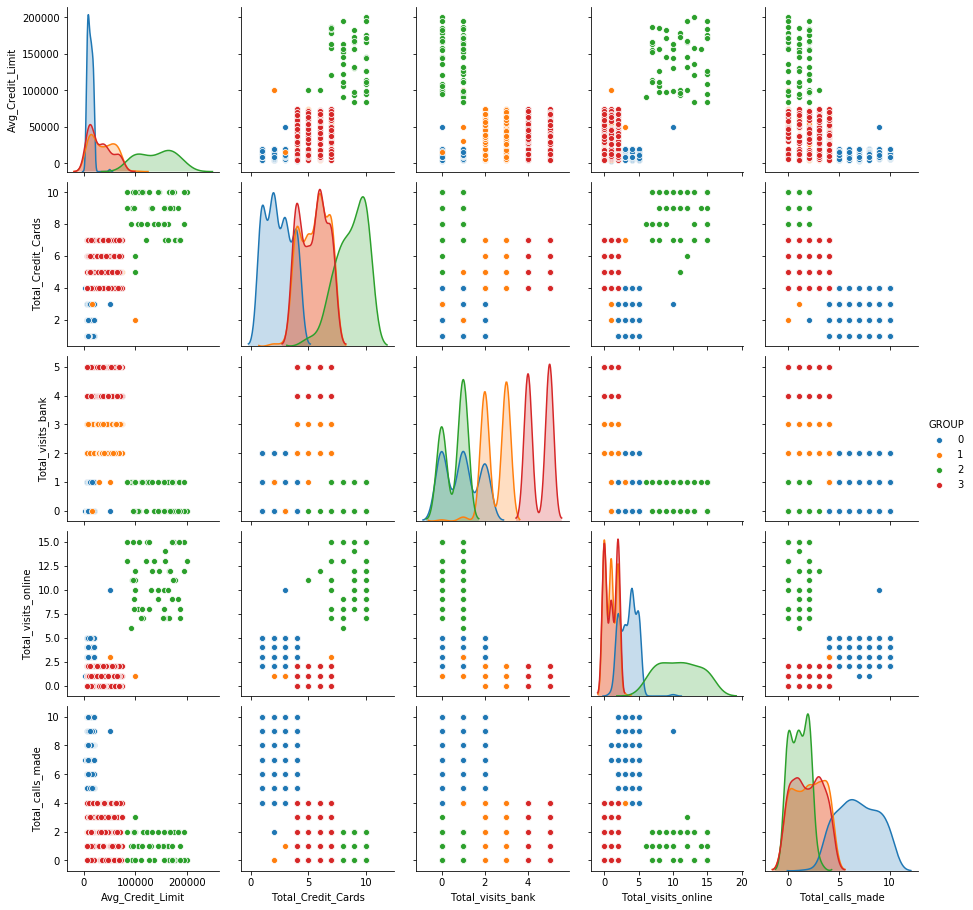

In [69]:
best_columns = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made']

best_columns.append("GROUP")
plt.figure(figsize=(25,25))
sns.pairplot( df[best_columns], hue="GROUP")

In [70]:
df.describe().round(1)

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
count  660.0         660.0             660.0               660.0   
mean   330.5       55141.4           34574.2                 4.7   
std    190.7       25627.8           37625.5                 2.2   
min      1.0       11265.0            3000.0                 1.0   
25%    165.8       33825.2           10000.0                 3.0   
50%    330.5       53874.5           18000.0                 5.0   
75%    495.2       77202.5           48000.0                 6.0   
max    660.0       99843.0          200000.0                10.0   

       Total_visits_bank  Total_visits_online  Total_calls_made  GROUP  
count              660.0                660.0             660.0  660.0  
mean                 2.4                  2.6               3.6    1.3  
std                  1.6                  2.9               2.9    1.2  
min                  0.0                  0.0               0.0    0.0  
25%                  1.0                  1.0               1.0    0.0  
50%                  2.0                  2.0               3.0    1.0  
75%                  4.0                  4.0               5.0    3.0  
max                  5.0                 15.0              10.0    3.0

### 8. Conclusion


After developing and executing two different clustering methods K-Means and Hierarchical method, we choose the Hierarchical Method mainly due to the highest scores (silhouette and cophenet index)but to the highest number of segmentation of the Bank Customers to four Groups/clusters.
This implies that we can explain more customers behaviors two the Marketing and Customer care/Helpdesk officers of the Bank in order to succeed to form a new Marketing Strategy also attract the current customers by offering better services.

More specifically the customers' segmentation and the respective clusters has as follows:

* **Cluster 0:** In this cluster belong half of the main body of the Bank customers (190) which is the category of customers with Average Credit Limit from 25000 to 85000 and they hold from 4 to 7 credit cards. What differentiate them from the other half included in 'cluster 3' is mainly that they use to visit very often the Bank premises (4 or 5 times each). This is significant and need the attention of the Marketing Department and Customer Care as well because these probably are not so happy customers.<br>  
* **Cluster 1:** In this cluster belong the 1/3 of customers, that is 223 customers that have Average Credit Limit from 3000 to 25000, hold up to 4 credit cards and they prefer telephone to communicate with the Bank. So these are the new potential customers to buy new products or upgrade their status. However Bank responsible must promote them the use of web banking.<br>

* **Cluster 2:** In this cluster belong few (50) probably the financially wealthy customers of the Bank with high Average Credit card Limit from 90000 to 200000, holding many cards (most of them 7-10. These good customers rarely visit the bank (only 1 time)but they extensively use the web Banking services (7-15 times). Their behavior pattern can be used as a paradigm. However a scheme to minimize the number of the cards they hold but keep their credit limit may be considered by the Market Department. <br>

* **Cluster 3:** In this cluster belong the other half of the main body of the Bank customers (197) which is the category of customers with Average Credit Limit (for the majority of them) from 25000 to 85000.However this cluster incorporates  significant differences in the data observations and some extreme customer behaviors, more specifically: <br>
In the Average Credit Limit there are few customers with high credit (100.000) <br>
In the number of Credit Card, few of them hold 2 or 3 cards, the majority 4-7 like Custer 0 <br>
Most of them, like Cluster 0, have 2 online visits but their  are few with 3 <br>
They have visited the Bank Premices 2 or 3 times mainly but there are also few that have never visit or visit once the Bank.
All the above considerations for this Cluster indicate that there are few paradox customer behaviors, that the Officers must isolate and treat individually.


